# HM1: Logistic Regression.

### Name: Hamza Shabir


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [28]:
# Load Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [29]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1.2 Examine and clean data

In [30]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
X = data.iloc[:,2:32]
y = data.iloc[:,1]
y = y.replace({'B': 1, 'M': -1})

## 1.3. Partition to training and testing sets

In [31]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [32]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).values.reshape(1, d)
sig = numpy.std(x_train, axis=0).values.reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
radius_mean                0.013646
texture_mean               0.122535
perimeter_mean             0.017830
area_mean                  0.007201
smoothness_mean            0.221149
compactness_mean           0.068722
concavity_mean            -0.006214
concave points_mean        0.083925
symmetry_mean              0.011485
fractal_dimension_mean     0.028301
radius_se                  0.055695
texture_se                 0.130663
perimeter_se               0.018831
area_se                    0.028115
smoothness_se              0.084815
compactness_se            -0.042242
concavity_se              -0.144548
concave points_se         -0.077631
symmetry_se               -0.019083
fractal_dimension_se      -0.045792
radius_worst               0.035400
texture_worst              0.116600
perimeter_worst            0.023669
area_worst                 0.031653
smoothness_worst           0.181063
compactness_worst          0.049100
concavity_worst           -0.057414
concave points_

## 1.5. Adding bias term

In [33]:
n_train, d = x_train.shape
x_train = np.concatenate((x_train, np.ones((n_train, 1))), axis=1)
n_test, d = x_test.shape
x_test = np.concatenate((x_test, np.ones((n_test, 1))), axis=1)
print('Shape of x_train: ' + str(x_train.shape))
print('Shape of x_test: ' + str(x_test.shape))

Shape of x_train: (455, 31)
Shape of x_test: (114, 31)


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [34]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)


def objective(w, x, y, lam):
        loss = np.mean(np.log(1+ np.exp(-(np.dot(np.multiply(y,x),w))))) + (lam/2)* np.sum(np.square(w))
        return loss

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [35]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    d = x.shape[1]
    gradient = -np.mean(np.divide(np.multiply(y,x),(1+ np.exp((np.dot(np.multiply(y,x),w))))), axis=0).reshape(d,1) + (lam * w)
    return gradient

In [36]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, max_epoch=100):
    n, d = x.shape
    objvals = numpy.zeros(max_epoch) # store the objective values

    w = numpy.zeros((d, 1)) # zero initialization
    
    y = np.array(y).reshape((n,1))
        
    for epoch in range(max_epoch):
        dw = gradient(w, x, y, lam)
        w -= learning_rate * dw
        objval = objective(w, x, y, lam)
        objvals[epoch] = objval
    return w, objvals

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [37]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 0.01
w_gd, objvals_gd = gradient_descent(x_train, y_train, lam, learning_rate)

In [38]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 1E-6
learning_rate = 0.01
w_gd_reg, objvals_gd_reg = gradient_descent(x_train, y_train, lam, learning_rate)

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [39]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    yx = np.multiply(yi,xi)
    yxw = np.dot(yx,w)

    loss = np.log(1+ np.exp(-yxw)) + (lam/2) * np.sum(np.square(w))

    gradient = -(yx) / (1+ np.exp(yxw)) + (lam * w).reshape(xi.shape[0])

    return loss, gradient

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [40]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, max_epoch=100):
    n, d = x.shape
    objvals = numpy.zeros(max_epoch) # store the objective values
    
    w = numpy.zeros((d, 1)) # zero initialization
       
    y = np.array(y).reshape((n,1))

    for epoch in range(max_epoch):
        # randomly shuffle the samples
        rand_indices = numpy.random.permutation(n)
        x_random = x[rand_indices, :]
        y_random = y[rand_indices, :]


        objval = 0 # accumulate the objective values
        for i in range(n):
            xi = x_random[i, :] # 1-by-d matrix
            yi = float(y_random[i, :]) # scalar
            obj, dw = stochastic_objective_gradient(w, xi, yi, lam)
            objval += obj
            w -= (learning_rate * dw.reshape((d,1)))
        objval /= n
        objvals[epoch] = objval
    return w, objvals

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [41]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 0.01
w_sgd, objvals_sgd = sgd(x_train, y_train, lam, learning_rate)

In [42]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 1E-6
learning_rate = 0.01
w_sgd_reg, objvals_sgd_reg = sgd(x_train, y_train, lam, learning_rate)

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [43]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: b-by-1 matrix
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    d = xi.shape[1]
    yx = np.multiply(yi, xi)
    yxw = np.dot(yx,w)


    loss = np.mean(np.log(1+ np.exp(-yxw))) + (lam/2)* np.sum(np.square(w))
    gradient = np.mean(np.divide(-yx,(1+ np.exp(yxw))), axis=0).reshape(d,1) + (lam * w)
    return loss, gradient

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [44]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, batch_size, max_epoch=100):
    n, d = x.shape
    objvals = numpy.zeros(max_epoch) # store the objective values
    
    w = numpy.zeros((d, 1)) # zero initialization
       
    y = np.array(y).reshape((n,1))

    for epoch in range(max_epoch):
        # randomly shuffle the samples
        rand_indices = numpy.random.permutation(n)
        x_random = x[rand_indices, :]
        y_random = y[rand_indices, :]


        objval = 0 # accumulate the objective values
        for i in range((n - 1) // batch_size + 1):
            start_i = i * batch_size
            end_i = start_i + batch_size
            x_batch = x_random[start_i:end_i]
            y_batch = y_random[start_i:end_i]

            obj, dw = mb_objective_gradient(w, x_batch, y_batch, lam)
            objval += obj
            w -= learning_rate * dw
        objval /= batch_size
        objvals[epoch] = objval
    return w, objvals

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [45]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 0
learning_rate = 0.01
batch_size = 50
w_mbgd, objvals_mbgd = mbgd(x_train, y_train, lam, learning_rate, batch_size)

In [46]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
lam = 1E-6
learning_rate = 0.1
batch_size = 50
w_mbgd_reg, objvals_mbgd_reg = mbgd(x_train, y_train, lam, learning_rate, batch_size)

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

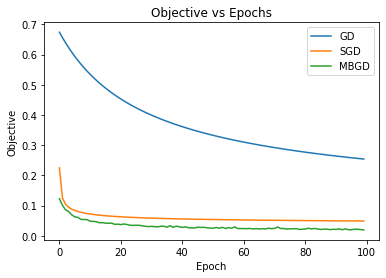

In [47]:
%matplotlib inline

epochs_gd = range(len(objvals_gd))
epochs_sgd = range(len(objvals_sgd))
epochs_mbgd = range(len(objvals_mbgd))

line0, = plt.plot(epochs_gd, objvals_gd)
line1, = plt.plot(epochs_sgd, objvals_sgd)
line2, = plt.plot(epochs_mbgd, objvals_mbgd)
plt.title("Objective vs Epochs")
plt.xlabel('Epoch')
plt.ylabel('Objective')
plt.legend([line0, line1, line2], ['GD', 'SGD', 'MBGD'])

plt.show()


# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [48]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    predictions = (np.dot(X, w))
    predicted_class = [1 if i > 0 else -1 for i in predictions]
    return np.array(predicted_class)

In [49]:
# evaluate training error of logistic regression and regularized version
y_train_pred = predict(w_gd,x_train)
train_accuracy_gd = accuracy_score(y_train, y_train_pred)
print("Training accuracy for GD model: " + str(train_accuracy_gd))

y_train_pred = predict(w_sgd,x_train)
train_accuracy_sgd = accuracy_score(y_train, y_train_pred)
print("Training accuracy for SGD model: " + str(train_accuracy_sgd))

y_train_pred = predict(w_mbgd,x_train)
train_accuracy_mbgd = accuracy_score(y_train, y_train_pred)
print("Training accuracy for MBGD model: " + str(train_accuracy_mbgd))

Training accuracy for GD model: 0.9516483516483516
Training accuracy for SGD model: 0.9868131868131869
Training accuracy for MBGD model: 0.9824175824175824


In [50]:
# regularized version
y_train_pred = predict(w_gd_reg,x_train)
train_accuracy_gd_reg = accuracy_score(y_train, y_train_pred)
print("Training accuracy for regularized GD model: " + str(train_accuracy_gd_reg))

y_train_pred = predict(w_sgd_reg,x_train)
train_accuracy_sgd_reg = accuracy_score(y_train, y_train_pred)
print("Training accuracy for regularized SGD model: " + str(train_accuracy_sgd_reg))

y_train_pred = predict(w_mbgd_reg,x_train)
train_accuracy_mbgd_reg = accuracy_score(y_train, y_train_pred)
print("Training accuracy for regularized MBGD model: " + str(train_accuracy_mbgd_reg))

Training accuracy for regularized GD model: 0.9516483516483516
Training accuracy for regularized SGD model: 0.9868131868131869
Training accuracy for regularized MBGD model: 0.9868131868131869


In [51]:
# evaluate testing error of logistic regression and regularized version
y_test_pred = predict(w_gd,x_test)
test_accuracy_gd = accuracy_score(y_test, y_test_pred)
print("Testing accuracy for GD model: " + str(test_accuracy_gd))

y_test_pred = predict(w_sgd,x_test)
test_accuracy_sgd = accuracy_score(y_test, y_test_pred)
print("Testing accuracy for SGD model: " + str(test_accuracy_sgd))

y_test_pred = predict(w_mbgd,x_test)
test_accuracy_mbgd = accuracy_score(y_test, y_test_pred)
print("Testing accuracy for MBGD model: " + str(test_accuracy_mbgd))

Testing accuracy for GD model: 0.9736842105263158
Testing accuracy for SGD model: 0.9824561403508771
Testing accuracy for MBGD model: 0.9824561403508771


In [52]:
# regularized version
y_test_pred = predict(w_gd_reg,x_test)
test_accuracy_gd_reg = accuracy_score(y_test, y_test_pred)
print("Testing accuracy for GD regularized model: " + str(test_accuracy_gd_reg))

y_test_pred = predict(w_sgd_reg,x_test)
test_accuracy_sgd_reg = accuracy_score(y_test, y_test_pred)
print("Testing accuracy for SGD regularized model: " + str(test_accuracy_sgd_reg))

y_test_pred = predict(w_mbgd_reg,x_test)
test_accuracy_mbgd_reg = accuracy_score(y_test, y_test_pred)
print("Testing accuracy for MBGD regularized model: " + str(test_accuracy_mbgd_reg))

Testing accuracy for GD regularized model: 0.9736842105263158
Testing accuracy for SGD regularized model: 0.9824561403508771
Testing accuracy for MBGD regularized model: 0.9824561403508771


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [54]:
# lam = 1E-6
lam = 1E-3
learning_rate = 0.001
epochs = 1000


w_gd_reg, objvals_gd_reg = gradient_descent(x_train, y_train, lam, learning_rate, epochs)

w_sgd_reg, objvals_sgd_reg = sgd(x_train, y_train, lam, learning_rate, epochs)

w_mbgd_reg, objvals_mbgd_reg = mbgd(x_train, y_train, lam, learning_rate, batch_size, epochs)

# evaluate testing error of logistric regression and regularized version
y_test_pred = predict(w_gd_reg,x_test)
test_accuracy_gd = accuracy_score(y_test, y_test_pred)
print("Testing accuracy for GD model: " + str(test_accuracy_gd))

y_test_pred = predict(w_sgd_reg,x_test)
test_accuracy_sgd = accuracy_score(y_test, y_test_pred)
print("Testing accuracy for SGD model: " + str(test_accuracy_sgd))

y_test_pred = predict(w_mbgd_reg,x_test)
test_accuracy_mbgd = accuracy_score(y_test, y_test_pred)
print("Testing accuracy for MBGD model: " + str(test_accuracy_mbgd))

Testing accuracy for GD model: 0.9736842105263158
Testing accuracy for SGD model: 0.9824561403508771
Testing accuracy for MBGD model: 0.9824561403508771
